In [1]:
import pickle
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import time
from utility import *

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


### Question 1
    Please refer to split_data.py and utility.py.

In [2]:
# pre-process data
training_X, training_Y, validation_X, validation_Y, test_X, test_Y, vocabulary = format_dataset(X=20)

### Question 2


In [3]:
def error(W, X, Y):
    # np.dot(X, W) * Y == 0 is not treated as error because there are feature vectors that only contains 0.
    return np.sum(np.dot(X, W) * Y < 0)
def perceptron_error(W, X, Y):
    N, D = X.shape
    return error(W, X, Y) / N
# train perceptron using full batch
# def perceptron_train(W, X, Y, learning_rate=1, logging_interval=1, maximum_n_iterations=None):
#     N, D = X.shape
#     total_n_errors = 0
#     n_iterations = 0
#     while True:
#         t0 = time.time()
#         predictions = np.dot(X, W)
#         update_filter = predictions * Y < 0
#         n_errors = np.sum(update_filter)
#         if n_errors == 0: break
#         else: total_n_errors += n_errors
#         gradient = np.sum(update_filter * Y * X, axis=0).reshape((D, 1))
#         W += learning_rate * gradient
#         n_iterations += 1
#         if maximum_n_iterations is not None and maximum_n_iterations < n_iterations: break
#         if isinstance(logging_interval, int):
#             if n_iterations % logging_interval == 0:
#                 print('iteration %d errors %d time %fs' % (n_iterations, n_errors, time.time() - t0))
#     return W, total_n_errors, n_iterations
def perceptron_train(W, X, Y, logging_interval=1, maximum_n_iterations=None):
    N, D = X.shape
    total_n_errors = 0
    n_iterations = 0
    while True:
        current_iteration_n_errors = 0
        for i, point in enumerate(zip(X, Y)):
            data, label = point
            if np.sum(data) == 0: continue
            prediction = np.dot(data, W)
            if not prediction * label > 0:
                current_iteration_n_errors += 1
                W += (label * data).reshape((D, 1))
        n_iterations += 1
        if logging_interval is not None and n_iterations % logging_interval == 0:
            print('iteration %d %d errors encountered' % (n_iterations, current_iteration_n_errors))
        total_n_errors += current_iteration_n_errors
        if current_iteration_n_errors == 0 or current_iteration_n_errors == maximum_n_iterations: break
    return W, total_n_errors, n_iterations

### Question 3
    Train perceptron.

In [4]:
D = len(vocabulary) # dimension of feature vector
W = np.zeros((D, 1))
N_TRAINING_SAMPLES = 4000
W, n_errors, n_iterations = perceptron_train(
    W,
    training_X[:N_TRAINING_SAMPLES],
    training_Y[:N_TRAINING_SAMPLES],
    logging_interval=1
)

iteration 1 242 errors encountered
iteration 2 73 errors encountered
iteration 3 36 errors encountered
iteration 4 12 errors encountered
iteration 5 16 errors encountered
iteration 6 12 errors encountered
iteration 7 4 errors encountered
iteration 8 6 errors encountered
iteration 9 6 errors encountered
iteration 10 5 errors encountered
iteration 11 5 errors encountered
iteration 12 8 errors encountered
iteration 13 0 errors encountered


In [5]:
# total errors encountered
n_errors

425

In [6]:
# number of iterations
n_iterations

13

In [7]:
# check whether there is no error on training set
perceptron_error(W, training_X, training_Y)

0.0

In [8]:
# test perceptron on validation set
validation_errors = perceptron_error(W, validation_X, validation_Y)
validation_errors

0.014

### Question 4

In [9]:
weights = W.tolist()
sorted_vocabulary = sorted(vocabulary, key=lambda word: weights[vocabulary.index(word)])
N = 12
n_words = len(vocabulary)
print('%d most negative words:' % N, *sorted_vocabulary[:N])
print('%d most positive words:' % N, *sorted_vocabulary[n_words - N:])

12 most negative words: still wrote i messag but inc note prefer on set standard two
12 most positive words: further present within hour market remov yourself below deathtospamdeathtospamdeathtospam guarante our sight


### Question 5 & Question 6
    Investigate the influence of number of training samples on test accuracy and number of iteration.

In [10]:
# record number of iteration and validation error
n_update_table = {4000 : n_iterations}
validation_error_table = {4000 : validation_errors}
for N_TRAINING_SAMPLES in (100, 200, 400, 800, 2000):
    W = np.zeros((D, 1))
    W, n_errors, n_iterations = perceptron_train(
        W,
        training_X[:N_TRAINING_SAMPLES],
        training_Y[:N_TRAINING_SAMPLES],
        logging_interval=None
    )
    n_update_table[N_TRAINING_SAMPLES] = n_iterations
    # use validation data to test perceptron
    validation_error_table[N_TRAINING_SAMPLES] = perceptron_error(W, validation_X, validation_Y)

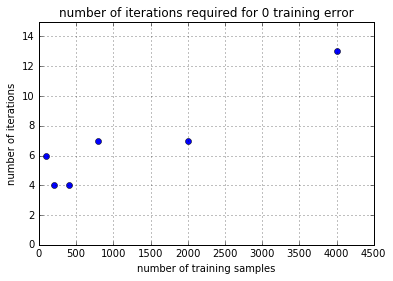

In [11]:
# plot number of iteration
pl.plot(list(n_update_table.keys()), list(n_update_table.values()), 'bo')
pl.xlabel('number of training samples')
pl.ylabel('number of iterations')
pl.title('number of iterations required for 0 training error')
pl.xlim(0, 4500)
pl.ylim(0, 15)
pl.grid()

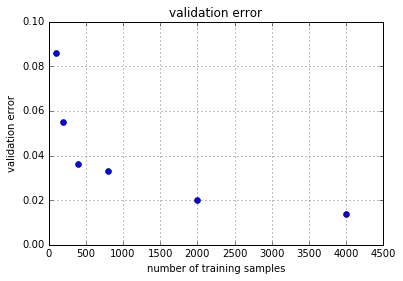

In [12]:
# plot validation error
pl.plot(list(validation_error_table.keys()), list(validation_error_table.values()), 'bo')
pl.xlabel('number of training samples')
pl.ylabel('validation error')
pl.title('validation error')
pl.xlim(0, 4500)
pl.ylim(0, 0.1)
pl.grid()

### Question 7
    Control the maximum number of iterations and observe its influence.

In [13]:
W = np.zeros((D, 1))
N_TRAINING_SAMPLES = 4000
MAXIMUM_n_iterations = 20
W, n_errors, n_iterations = perceptron_train(
    W,
    training_X[:N_TRAINING_SAMPLES],
    training_Y[:N_TRAINING_SAMPLES],
    maximum_n_iterations=MAXIMUM_n_iterations # set maximum number of iterations
)

iteration 1 242 errors encountered
iteration 2 73 errors encountered
iteration 3 36 errors encountered
iteration 4 12 errors encountered
iteration 5 16 errors encountered
iteration 6 12 errors encountered
iteration 7 4 errors encountered
iteration 8 6 errors encountered
iteration 9 6 errors encountered
iteration 10 5 errors encountered
iteration 11 5 errors encountered
iteration 12 8 errors encountered
iteration 13 0 errors encountered


In [14]:
# validation error
perceptron_error(W, validation_X, validation_Y)

0.014

### Question 8
    Search the hyperparameter space of X.

In [15]:
validation_error_table = {}
optimal_validation_error = 1
for X in (30, 40, 50, 60, 80, 100, 120, 160, 200):
    training_X, training_Y, validation_X, validation_Y, test_X, test_Y, vocabulary = format_dataset(X)
    W = np.zeros((len(vocabulary), 1))
    W, n_errors, n_updates = perceptron_train(W, training_X, training_Y, logging_interval=None)
    validation_error = perceptron_error(W, validation_X, validation_Y)
    validation_error_table[X] = validation_error
    if validation_error < optimal_validation_error:
        optimal_validation_error = validation_error
        optimal_W = W
        optimal_test_X, optimal_test_Y = test_X, test_Y

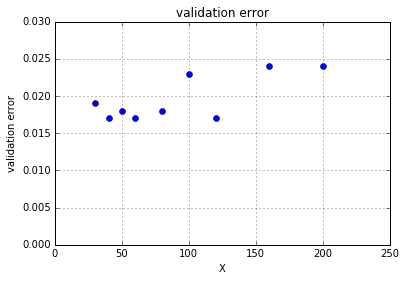

In [16]:
# plot validation error
pl.plot(list(validation_error_table.keys()), list(validation_error_table.values()), 'bo')
pl.xlabel('X')
pl.ylabel('validation error')
pl.title('validation error')
pl.xlim(0, 250)
pl.ylim(0, 0.03)
pl.grid()

In [17]:
optimal_validation_error

0.017000000000000001

In [18]:
# test optimal perceptron
perceptron_error(optimal_W, optimal_test_X, optimal_test_Y)

0.017999999999999999

### Question 9
    Provided X equaling 1200, the data is not linearly separable.

In [19]:
# generate data
training_X, training_Y, validation_X, validation_Y, test_X, test_Y, vocabulary = format_dataset(X=1200)

In [20]:
# number of features
len(vocabulary)

53

In [21]:
# count the number of identical data points that are labelled differently
positive_set = set(tuple(point) for point in training_X[training_Y.flatten() == 1].tolist())
negative_set = set(tuple(point) for point in training_X[training_Y.flatten() == -1].tolist())
len(positive_set & negative_set)

9

### Question 10
    The purpose of training set is to enable model to learn from data. Validation set is used to optimize hyperparameters involved in model while not touching test data. Test set is used to evaluate the performance of a model when it encounters data that it never encountered previously.